# ros_gmapping_movebase

This ROS package provides three behaviors for controlling a simulated mobile robot using gmapping and movebase rospackages. You can get to know more about the detatils of the source code using this documentation: https://aliy98.github.io/ros_gmapping_movebase/

# master node
 gets user request to choose robot behaviour using robot_state rosparam
 

In [8]:
import ipywidgets as widgets
import rospy
from std_srvs.srv import *

w = widgets.RadioButtons(
    options=['1. movebase client', '2. teleop keyboard', '3. assisted teleop'],
#    value='1. movebase client', # Defaults to 'pineapple'
#   layout={'width': 'max-content'}, # If the items' names are long
#    description='',
    disabled=False
)
display(w)

RadioButtons(options=('1. movebase client', '2. teleop keyboard', '3. assisted teleop'), value='1. movebase cl…

In [9]:
# changes robot's behaviour and sends the corresponding response to other three nodes
if w.value == '1. movebase client':
    rospy.set_param('robot_state', '1')
elif w.value == '2. teleop keyboard':
    rospy.set_param('robot_state', '2')
elif w.value == '3. assisted teleop':
    rospy.set_param('robot_state', '3')
print("robot behaviour changed to: ")
print(w.value)

robot behaviour changed to: 
1. movebase client


## 1. movebase client
gets desired position from user and sends it to movebase node using actionlib and if the goal is not reached before timeout cancels it

In [3]:
import jupyros as jr
from std_msgs.msg import String

print("enter goal position in format x,y:\n")
rospy.init_node('jupyter_node')
jr.publish('/movebase_client_goal', String)

enter goal position in format x,y:



## 2. teleop twist keyboard
it can implement two behaviours on robot:
1. moving without obstacle avoidance: user can move the robot using keys it publishes the desired movements to cmd_vel topic

2. moveing with obstacle avoidance: subscribes scan topic and uses it to detect obstacles. user can move the robot using keys and it also avoids the robot from colliding the obstacles

In [4]:
from ipywidgets import Button, Output, Layout, ButtonStyle, GridBox, VBox, HBox
from IPython.display import display
from std_msgs.msg import String


b1 = Button(description='u',layout=Layout(width='auto', grid_area='b1'),style=ButtonStyle(button_color='lightblue'))
o1 = Output()
b2 = Button(description='j',layout=Layout(width='auto', grid_area='b2'),style=ButtonStyle(button_color='salmon'))
o2 = Output()
b3 = Button(description='m',layout=Layout(width='auto', grid_area='b3'),style=ButtonStyle(button_color='lightblue'))
o3 = Output()
b4 = Button(description='i',layout=Layout(width='auto', grid_area='b4'),style=ButtonStyle(button_color='salmon'))
o4 = Output()
b5 = Button(description='k',layout=Layout(width='auto', grid_area='b5'),style=ButtonStyle(button_color='lightblue'))
o5 = Output()
b6 = Button(description=',',layout=Layout(width='auto', grid_area='b5'),style=ButtonStyle(button_color='salmon'))
o6 = Output()
b7 = Button(description='o',layout=Layout(width='auto', grid_area='b5'),style=ButtonStyle(button_color='lightblue'))
o7 = Output()
b8 = Button(description='l',layout=Layout(width='auto', grid_area='b5'),style=ButtonStyle(button_color='salmon'))
o8 = Output()
b9 = Button(description='.',layout=Layout(width='auto', grid_area='b5'),style=ButtonStyle(button_color='lightblue'))
o9 = Output()

def on_button_clicked1(b):
    with o1:
        pub.publish('u')
def on_button_clicked2(b):
    with o2:
        pub.publish('j')
def on_button_clicked3(b):
    with o3:
        pub.publish('m')
def on_button_clicked4(b):
    with o4:
        pub.publish('i')
def on_button_clicked5(b):
    with o5:
        pub.publish('k')
def on_button_clicked6(b):
    with o6:
        pub.publish(',')
def on_button_clicked7(b):
    with o7:
        pub.publish('o')
def on_button_clicked8(b):
    with o8:
        pub.publish('l')
def on_button_clicked9(b):
    with o9:
        pub.publish('.')
        
b1.on_click(on_button_clicked1)
b2.on_click(on_button_clicked2)
b3.on_click(on_button_clicked3)
b4.on_click(on_button_clicked4)
b5.on_click(on_button_clicked5)
b6.on_click(on_button_clicked6)
b7.on_click(on_button_clicked7)
b8.on_click(on_button_clicked8)
b9.on_click(on_button_clicked9)

pub = rospy.Publisher('/teleop_input_key', String, queue_size=10)
rospy.init_node('jupyter_node')
print("input direction:")
HBox([VBox([b1, b2, b3]),VBox([b4, b5, b6]),VBox([b7, b8, b9])])

input direction:


## Robot Position Plot


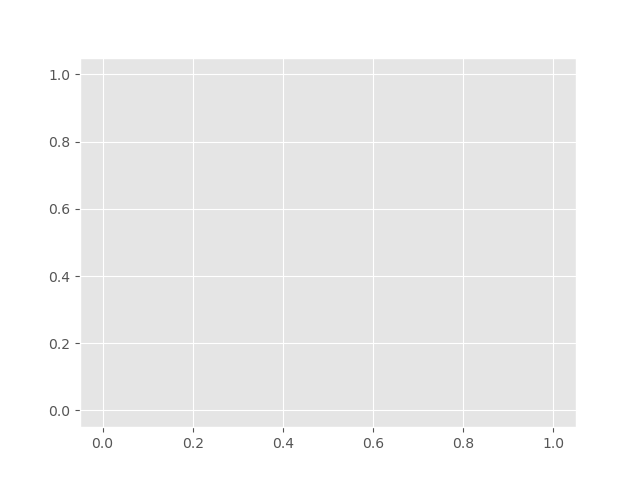

In [5]:
import matplotlib.pyplot as plt
import rospy
import tf
from nav_msgs.msg import Odometry
from tf.transformations import quaternion_matrix
import numpy as np
from matplotlib.animation import FuncAnimation
%matplotlib widget
plt.style.use('ggplot')

class Visualiser:
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        self.ln, = plt.plot([], [], 'ro')
        self.x_data, self.y_data = [] , []
 
    def plot_init(self):
        self.ax.set_xlim(-10, 10)
        self.ax.set_ylim(-10, 10)
        return self.ln

    def odom_callback(self, msg):
        self.y_data.append(msg.pose.pose.position.y)
        self.x_data.append(msg.pose.pose.position.x)

    def update_plot(self, frame):
        self.ln.set_data(self.x_data, self.y_data)
        return self.ln
rospy.init_node('jupyter_node')
vis = Visualiser()
sub = rospy.Subscriber('/odom', Odometry, vis.odom_callback)
ani = FuncAnimation(vis.fig, vis.update_plot, init_func=vis.plot_init,blit=True)
plt.show(block=True)


## 3D Visualization

In [6]:
from jupyros import ros3d
import os
v = ros3d.Viewer()
rc = ros3d.ROSConnection(url="ws://localhost:9090")
tf_client = ros3d.TFClient(ros=rc, fixed_frame='map')
laser_view = ros3d.LaserScan(topic="/scan", ros=rc, tf_client=tf_client)
map_view = ros3d.OccupancyGrid(topic="/map", ros=rc, tf_client=tf_client)
path = ros3d.Path(topic="/move_base/NavfnROS/plan", ros=rc,
tf_client=tf_client)
urdf = ros3d.URDFModel(ros=rc, tf_client=tf_client,
path=os.environ.get('JUPYROS_ASSETS_URL', 'http://localhost:3000'))
g = ros3d.GridModel()
v.objects = [g, laser_view, map_view, path, urdf]
v

Viewer(objects=[GridModel(), LaserScan(ros=ROSConnection(url='ws://localhost:9090'), tf_client=TFClient(fixed_…